# Feature Engineering
This notebook demonstrates feature engineering techniques for the dataset.

## Import Libraries
Import necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset
Load the dataset and inspect its structure.

In [2]:
df = pd.read_csv('datasets/luxury_watches_preprocessed.csv')
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300,40.0,13.00,20.0,Black,Sapphire,['Date'],48.0,9500.0,1
1,Omega,Seamaster,Titanium,Rubber,Automatic,600,43.5,14.47,21.0,Blue,Sapphire,['Date'],60.0,5800.0,1
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100,41.0,13.00,20.0,White,Sapphire,['Chronograph'],42.0,4200.0,3
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30,43.0,14.25,22.0,Black,Sapphire,['Chronograph'],70.0,7900.0,3
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30,31.0,6.05,20.0,Silver,Sapphire,['None'],55.0,2800.0,0


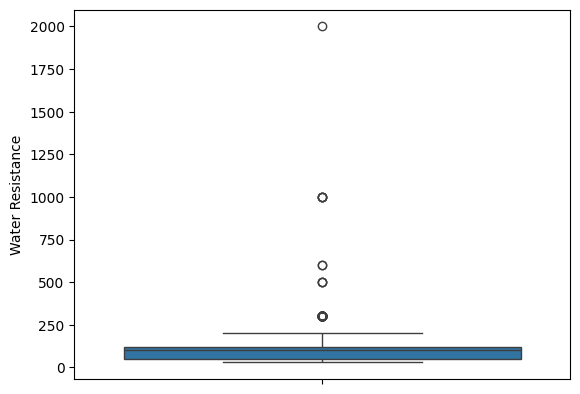

In [3]:
sns.boxplot(df['Water Resistance'])
plt.show()

In [4]:
num_columns = ['Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width', 'Power Reserve', 'Complication_Score', 'Price']

In [5]:
def clip_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    return df

In [6]:
for col in num_columns:
    df = clip_outliers(df, col)

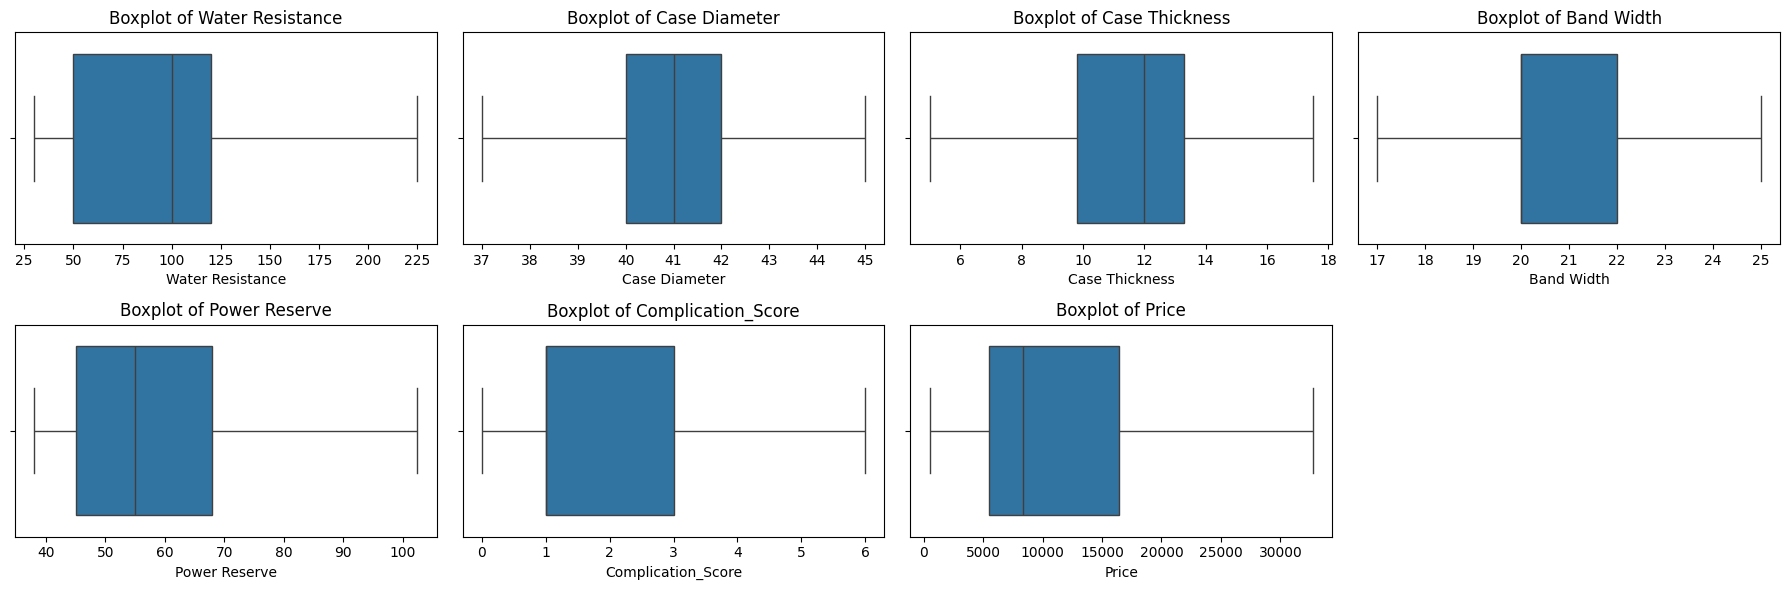

In [7]:
num_plots = len(num_columns)
n_rows = (num_plots // 4) + (num_plots % 4 > 0)
fig, axes = plt.subplots(n_rows, 4, figsize=(18, 6))
for i, col in enumerate(num_columns):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_xlabel(col)

for ax in axes.flatten()[num_plots:]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

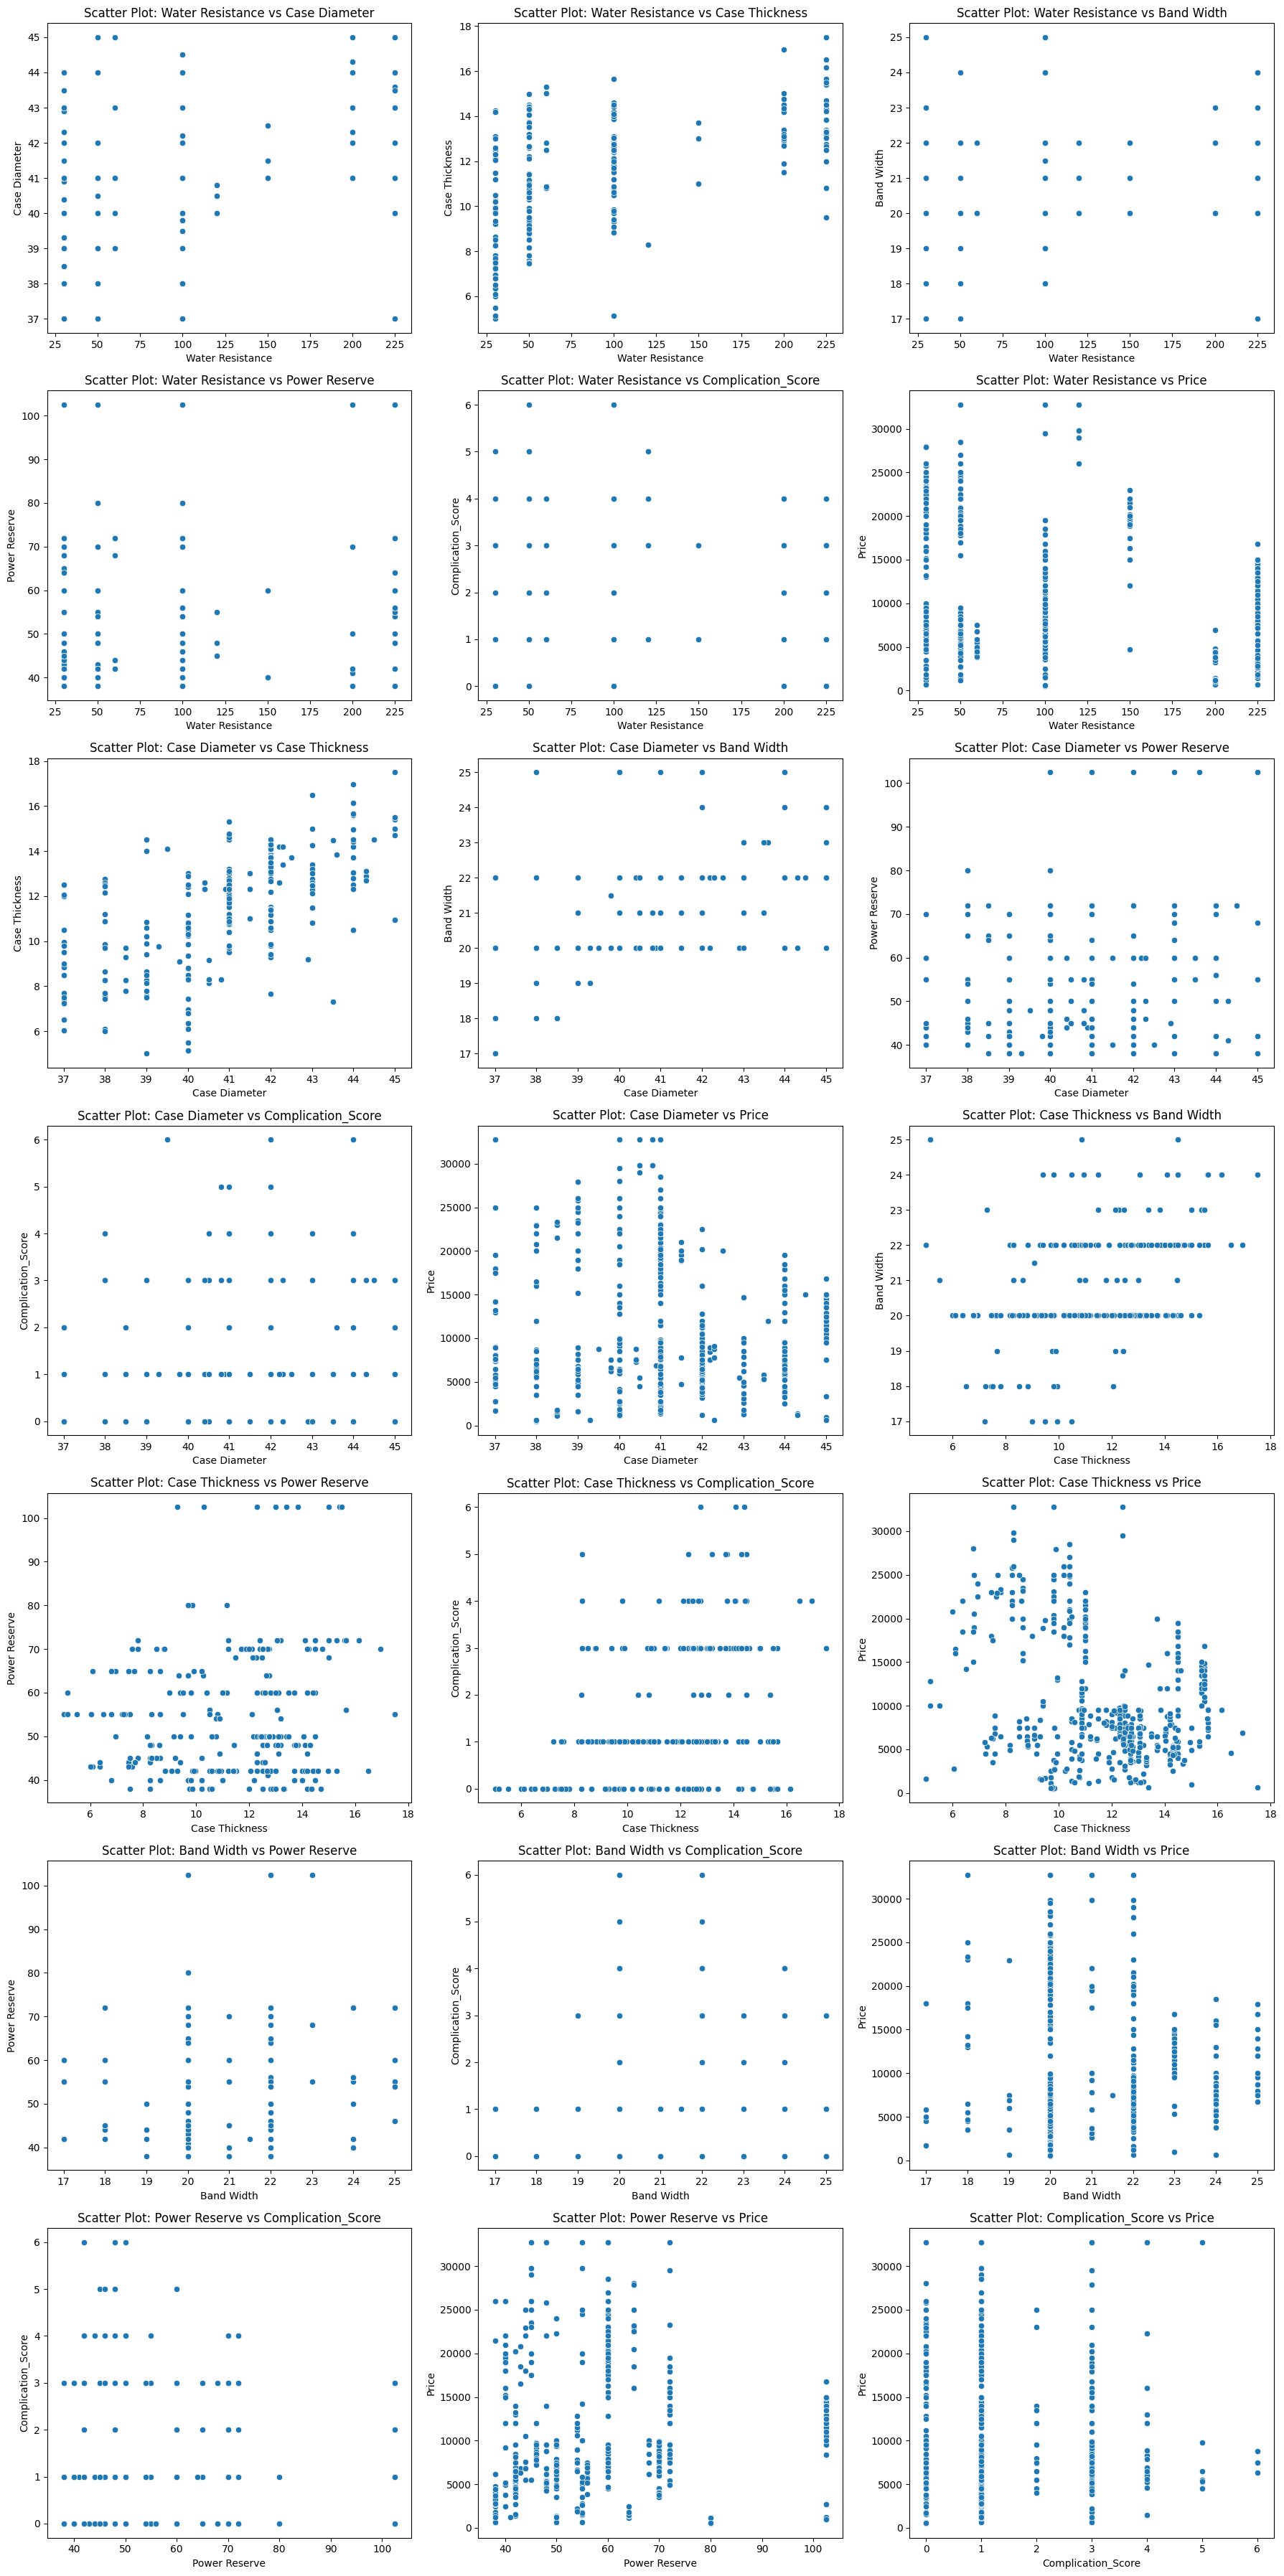

In [8]:
num_plots = len(num_columns) * (len(num_columns) - 1) // 2

n_rows = (num_plots // 3) + (num_plots % 3 > 0)
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,36))

if n_rows == 1:
    axes = axes.reshape(1, 2)

plot_idx = 0
for i in range(len(num_columns)):
    for j in range(i + 1, len(num_columns)):
        x_col = num_columns[i]
        y_col = num_columns[j]
        row = plot_idx // n_cols
        col_idx = plot_idx % n_cols
        sns.scatterplot(x=df[x_col], y=df[y_col], ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Scatter Plot: {x_col} vs {y_col}')
        axes[row, col_idx].set_xlabel(x_col)
        axes[row, col_idx].set_ylabel(y_col)
        plot_idx += 1

for ax in axes.flatten()[plot_idx:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
# for col in num_columns:
#     print(f"\nColumn: {col}")
#     print(df[col].describe())

In [10]:
df['Price'].describe()

count      507.000000
mean     11469.487179
std       8360.300393
min        495.000000
25%       5500.000000
50%       8350.000000
75%      16400.000000
max      32750.000000
Name: Price, dtype: float64

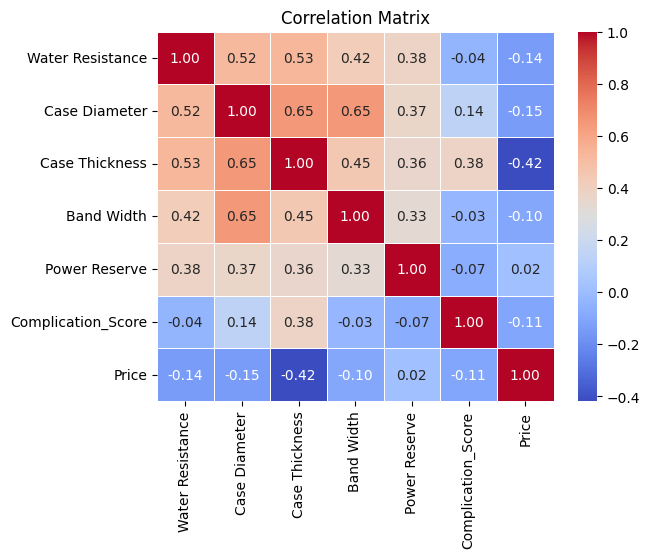

In [11]:
numeric_df = df[num_columns]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
cat_columns = ['Case Material', 'Strap Material', 'Movement Type', 'Dial Color', 'Crystal Material']

In [13]:
# for col in cat_columns:
#     print(f"\nColumn: {col}")
#     print(df[col].value_counts())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               507 non-null    object 
 1   Model               507 non-null    object 
 2   Case Material       507 non-null    object 
 3   Strap Material      507 non-null    object 
 4   Movement Type       507 non-null    object 
 5   Water Resistance    507 non-null    int64  
 6   Case Diameter       507 non-null    float64
 7   Case Thickness      507 non-null    float64
 8   Band Width          507 non-null    float64
 9   Dial Color          507 non-null    object 
 10  Crystal Material    507 non-null    object 
 11  Complications       507 non-null    object 
 12  Power Reserve       507 non-null    float64
 13  Price               507 non-null    float64
 14  Complication_Score  507 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 59.5+ KB

## Perform Feature Engineering
Apply various feature engineering techniques to enhance the dataset.

In [15]:
very_high_end = [
    'Patek Philippe', 'Audemars Piguet', 'Vacheron Constantin', 'A. Lange & Söhne', 'A. Lange & Sohne'
]
high_end = [
    'Rolex', 'Breguet', 'Jaeger-LeCoultre', 'Blancpain', 'IWC', 'Girard-Perregaux', 'Omega'
]
mid_range = [
    'Cartier', 'Breitling', 'Hublot', 'Panerai', 'Chopard', 'Tudor', 'Tag Heuer', 'TAG Heuer',
    'Longines', 'Ulysse Nardin', 'Montblanc', 'Seiko', 'Bell & Ross', 'Oris'
]

def brand_tier(brand):
    if brand in very_high_end:
        return 'Very High-End'
    elif brand in high_end:
        return 'High-End'
    elif brand in mid_range:
        return 'Mid-Range'
    else:
        return 'Other'

df['Brand_Tier'] = df['Brand'].apply(brand_tier)

In [16]:
very_high_end_models = [
    'Royal Oak', 'Nautilus', 'Overseas', 'Datograph', 'Lange 1', 'Patrimony',
    'Calatrava', 'Chronomaster El Primero', 'Octo Finissimo'
]

high_end_models = [
    'Submariner', 'Daytona', 'GMT-Master II', 'Datejust', 'Speedmaster Moonwatch',
    'Speedmaster', 'Seamaster', 'Reverso', 'Master Ultra Thin', 'Fifty Fathoms',
    'Portugieser', 'El Primero', 'Classique', 'Marine', 'Type XX', 'Type XXI'
]

mid_range_models = [
    'Carrera', 'Monaco', 'Tank Solo', 'Santos', 'Ballon Bleu', 'Luminor', 'Luminor Marina',
    'Luminor Due', 'Radiomir', 'Black Bay', 'Aqua Terra', 'Navitimer', 'Avenger II',
    'Chronomat', 'Happy Sport', 'BR 03-92', 'BR V2-92', 'Khaki Field', 'Khaki Field Auto',
    'HydroConquest', 'Conquest', 'Conquest VHP', 'Conquest Classic', 'Laureato',
    'Big Bang', 'Classic Fusion', 'Marine Torpilleur', 'Jazzmaster', 'Star Legacy',
    'Clifton Baumatic', 'Heritage', 'True Thinline', 'Classics'
]

def model_tier(model):
    if model in very_high_end_models:
        return 'Very High-End'
    elif model in high_end_models:
        return 'High-End'
    elif model in mid_range_models:
        return 'Mid-Range'
    else:
        return 'Other'

df['Model_Tier'] = df['Model'].apply(model_tier)

In [17]:
case_material_score = {
    'Platinum': 5, 'Rose Gold': 5, 'White Gold': 5, 'Yellow Gold': 5,
    'Titanium': 4, 'Carbon Fiber': 4, 'Ceramic': 4,
    'Stainless Steel': 2, 'Bronze': 3
}
strap_material_score = {
    'Gold': 5, 'Titanium': 4, 'Leather': 4,
    'Rubber': 3, 'Fabric': 2, 'NATO': 2, 'Stainless Steel': 2
}
crystal_material_score = {
    'Sapphire': 5, 'Non-Sapphire': 2
}
df['Luxury_Index'] = (
    df['Case Material'].map(case_material_score).fillna(1) +
    df['Strap Material'].map(strap_material_score).fillna(1) +
    df['Crystal Material'].map(crystal_material_score).fillna(2) +
    df['Complication_Score']
)

In [18]:
df['Material_Match'] = (df['Case Material'] == df['Strap Material']).astype(int)

In [19]:
def classify_movement(movement):
    movement = movement.lower()
    if 'automatic' in movement or 'manual' in movement:
        return 1
    else:
        return 0

df['Movement_Complexity'] = df['Movement Type'].apply(classify_movement)

In [20]:
def water_tier(water_resistance):
    if water_resistance <= 50:
        return 'Basic'
    elif water_resistance <= 150:
        return 'Standard'
    else:
        return 'Professional'

df['Water_Tier'] = df['Water Resistance'].apply(water_tier)

In [21]:
df['Case_Proportion'] = df['Case Diameter'] / (df['Case Thickness'] + 1e-5)

In [22]:
def case_size_category(diameter):
    if diameter < 36:
        return 0
    elif diameter <= 40:
        return 1
    else:
        return 2
df['Case_Size_Category'] = df['Case Diameter'].apply(case_size_category)

In [23]:
dial_color_score = {
    'Blue': 5,
    'White': 4,
    'Black': 3,
    'Silver': 3,
    'Others': 2
}
df['Dial_Score'] = df['Dial Color'].map(dial_color_score).fillna(2)

In [24]:
df['Has_Complication'] = (df['Complication_Score'] > 0).astype(int)

In [25]:
!pip install category_encoders


[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.preprocessing import LabelEncoder

label_enc_brand = LabelEncoder()
df['Brand_Tier_label_encoded'] = label_enc_brand.fit_transform(df['Brand_Tier'])

label_enc_model = LabelEncoder()
df['Model_Tier_label_encoded'] = label_enc_model.fit_transform(df['Model_Tier'])

from category_encoders import TargetEncoder

target_enc_brand = TargetEncoder()
df['Brand_Tier_target_encoded'] = target_enc_brand.fit_transform(df['Brand_Tier'], df['Price'])

target_enc_model = TargetEncoder()
df['Model_Tier_target_encoded'] = target_enc_model.fit_transform(df['Model_Tier'], df['Price'])

In [27]:
import joblib

joblib.dump(label_enc_brand, 'encoders/label_enc_brand.pkl')
joblib.dump(label_enc_model, 'encoders/label_enc_model.pkl')
joblib.dump(target_enc_brand, 'encoders/target_enc_brand.pkl')
joblib.dump(target_enc_model, 'encoders/target_enc_model.pkl')

['encoders/target_enc_model.pkl']

In [28]:
df['Brand_Case'] = df['Brand_Tier_label_encoded'] * df['Case_Proportion']
df['Brand_Crystal'] = df['Brand_Tier_label_encoded'] * (df['Crystal Material'].apply(lambda x: 1 if x == 'Sapphire' else 0))
df['Material_Crystal_Movement'] = df['Material_Match'] + (df['Crystal Material'].apply(lambda x: 1 if x == 'Sapphire' else 0)) + df['Movement_Complexity']

new_cols = ['Brand_Case', 'Brand_Crystal', 'Material_Crystal_Movement']
df[new_cols + ['Price']].corr()['Price']

Brand_Case                   0.580539
Brand_Crystal                0.526944
Material_Crystal_Movement    0.386074
Price                        1.000000
Name: Price, dtype: float64

In [29]:
df.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width',
       'Dial Color', 'Crystal Material', 'Complications', 'Power Reserve',
       'Price', 'Complication_Score', 'Brand_Tier', 'Model_Tier',
       'Luxury_Index', 'Material_Match', 'Movement_Complexity', 'Water_Tier',
       'Case_Proportion', 'Case_Size_Category', 'Dial_Score',
       'Has_Complication', 'Brand_Tier_label_encoded',
       'Model_Tier_label_encoded', 'Brand_Tier_target_encoded',
       'Model_Tier_target_encoded', 'Brand_Case', 'Brand_Crystal',
       'Material_Crystal_Movement'],
      dtype='object')

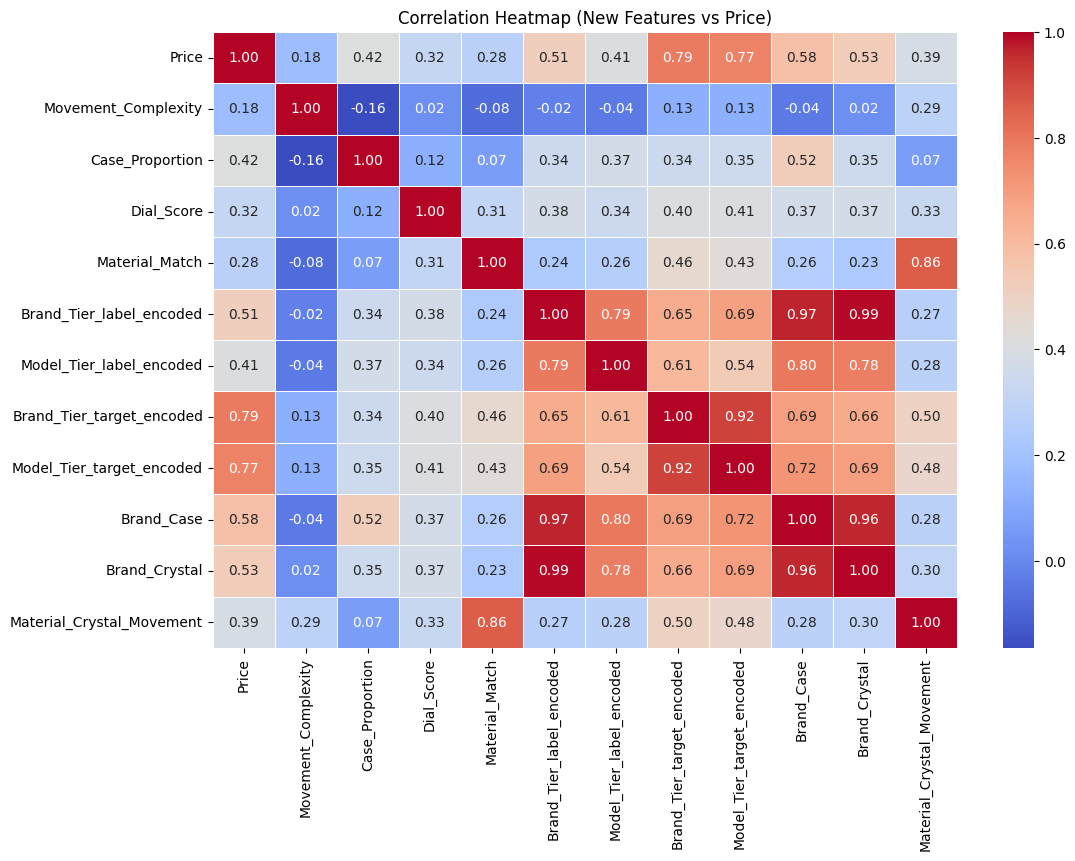

In [30]:
correlation_cols = [
    'Price', 'Movement_Complexity',
    'Case_Proportion', 'Dial_Score', 'Material_Match',
    'Brand_Tier_label_encoded','Model_Tier_label_encoded', 'Brand_Tier_target_encoded','Model_Tier_target_encoded',
    'Brand_Case', 'Brand_Crystal', 'Material_Crystal_Movement'
]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (New Features vs Price)')
plt.show()

In [31]:
ordered_columns = [
    'Brand', 'Model',
    'Case Material', 'Strap Material', 'Crystal Material', 'Dial Color',
    'Case Diameter', 'Case Thickness', 'Band Width', 'Case_Size_Category', 'Case_Proportion',
    'Movement Type', 'Movement_Complexity', 'Power Reserve', 'Complications', 'Has_Complication',
    'Water Resistance', 'Water_Tier',
    'Dial_Score', 'Complication_Score', 'Material_Match', 'Luxury_Index',
    'Brand_Tier', 'Model_Tier', 'Brand_Tier_label_encoded', 'Model_Tier_label_encoded',
    'Brand_Tier_target_encoded', 'Model_Tier_target_encoded',
    'Brand_Case', 'Brand_Crystal', 'Material_Crystal_Movement',
    'Price'
]

df = df[ordered_columns]

## Save Processed Dataset
Save the processed dataset for further analysis.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      507 non-null    object 
 1   Model                      507 non-null    object 
 2   Case Material              507 non-null    object 
 3   Strap Material             507 non-null    object 
 4   Crystal Material           507 non-null    object 
 5   Dial Color                 507 non-null    object 
 6   Case Diameter              507 non-null    float64
 7   Case Thickness             507 non-null    float64
 8   Band Width                 507 non-null    float64
 9   Case_Size_Category         507 non-null    int64  
 10  Case_Proportion            507 non-null    float64
 11  Movement Type              507 non-null    object 
 12  Movement_Complexity        507 non-null    int64  
 13  Power Reserve              507 non-null    float64

In [33]:
df.to_csv('datasets/luxury_watches_featured.csv', index=False)